Columns in the dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinati

C:\Users\Benton\AppData\Local\Temp\ipykernel_13644\1677615809.py:37: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



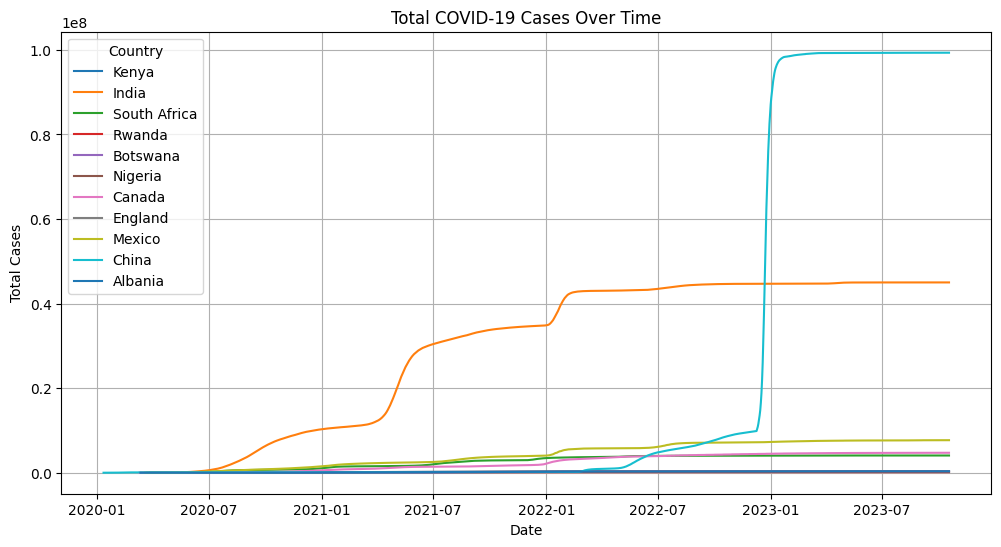

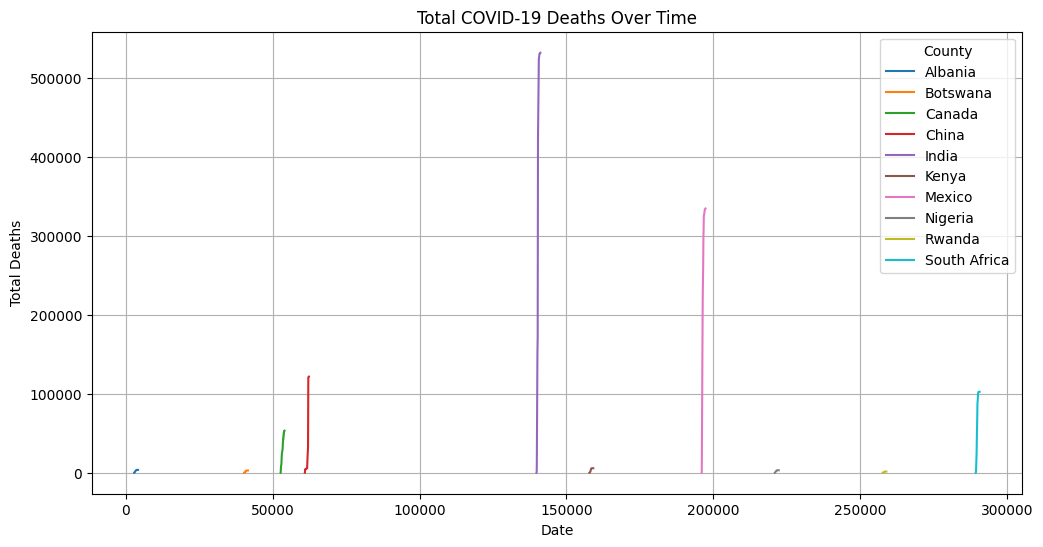

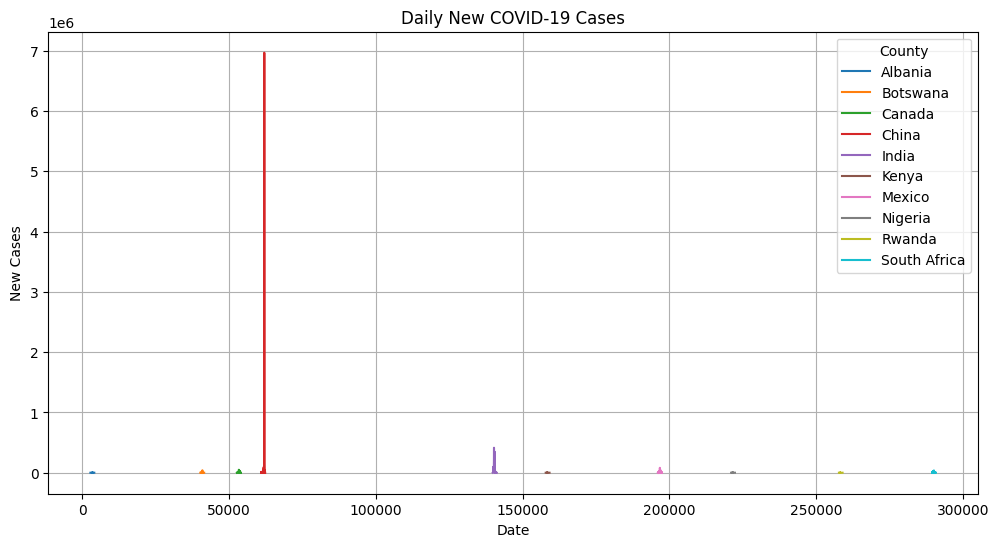

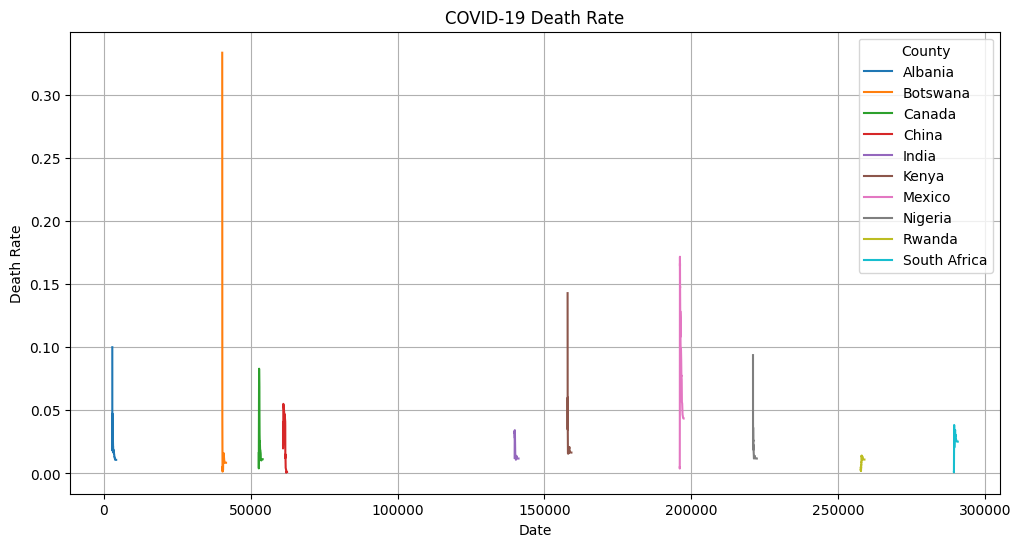

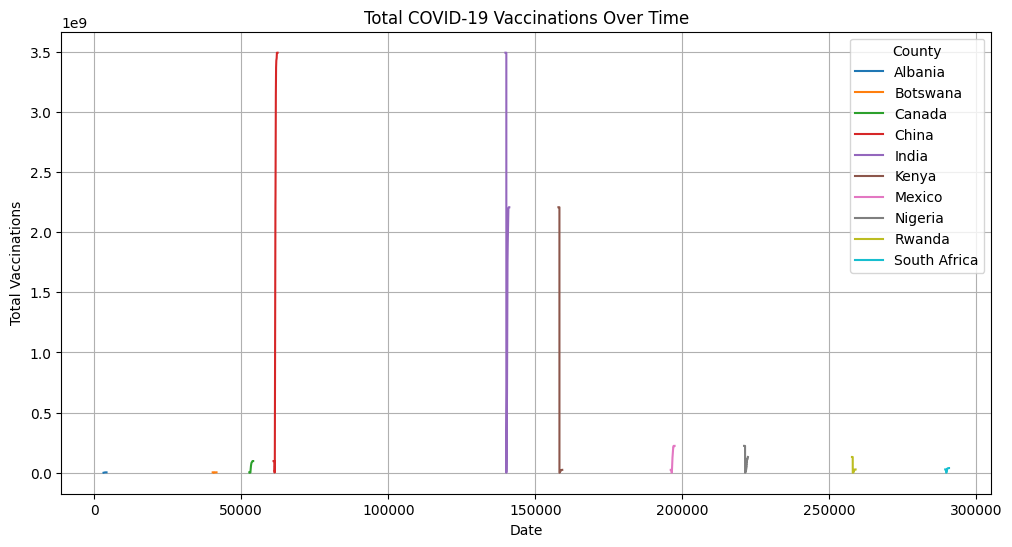

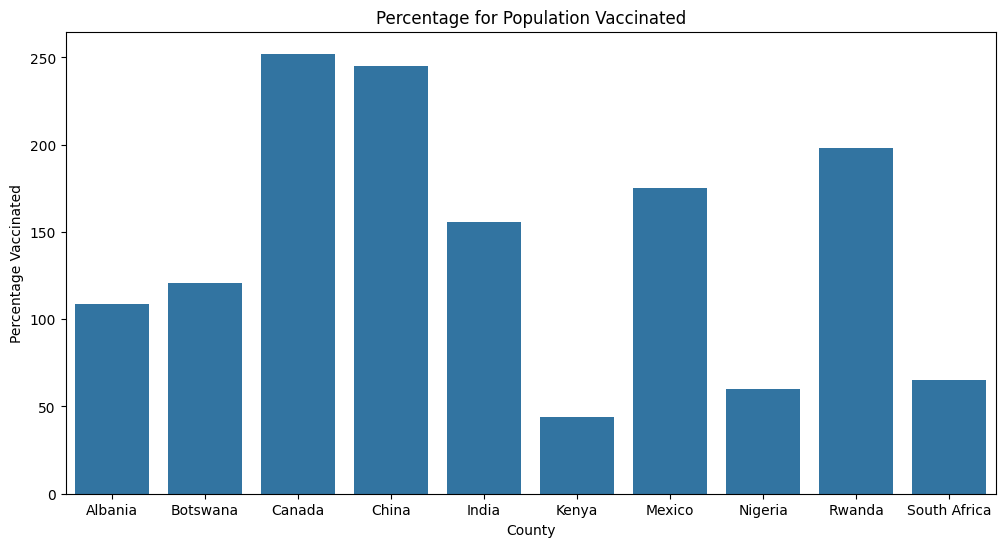

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Step 1
# Load the dataset
df= pd.read_csv('owid-covid-data.csv')


#Step2: Convert 'date' column to datetimw
# Check the columns
print("Columns in the dataset:")
print(df.columns)

#Preview the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

#Identifying missing values
print("\nMissing values per column:")
print(df.isnull().sum())


#Step 3: Data Cleaning
#Filter for countries
countries = ['Kenya', 'India', 'South Africa', 'Rwanda', 'Botswana', 'Nigeria', 'Canada', 'England', 'Mexico', 'China', 'Albania']
df = df[df['location'].isin(countries)]

#Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

#Drop rows with missing dates/critical values
df = df.dropna(subset=['total_cases', 'total_deaths'])

#Handling missing numeric values
df = df.fillna(method = 'ffill')


#Step 4: EDA - line charts
#Plot total cases over time for selected counties
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.grid(True) 
plt.show()

#Plot total deaths over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='County')
plt.grid(True) 
plt.show()

#Compare daily new cases btwn countires
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='County')
plt.grid(True) 
plt.show()


#Calculate the death rate: total_deaths / total_cases.
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y='death_rate', hue='location')
plt.title('COVID-19 Death Rate')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend(title='County')
plt.grid(True) 
plt.show()


#Step 5: Visualising Progress
#Total Vaccinations
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='County')
plt.grid(True) 
plt.show()

#Latest vaccination data for comparison
vlatest =df.groupby('location')['total_vaccinations'].last().reset_index()
tpopulation = df.groupby('location')['population'].last().reset_index()
compare = pd.merge(vlatest, tpopulation, on= 'location')
compare['percent_vaccinated'] = (compare['total_vaccinations'] / compare['population']) * 100

plt.figure(figsize=(12,6))
sns.barplot(x='location', y='percent_vaccinated', data=compare)
plt.title('Percentage for Population Vaccinated')
plt.xlabel('County')
plt.ylabel('Percentage Vaccinated') 
plt.show()


#Step 6:Build Choropleth Map
latest_cases = df[df['date'] == df['date'].max()]

fig = px.choropleth(latest_cases,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Total COVID-19 Cases by County')
fig.show()

#Map of Vaccinations 
v_global = df[df['date'] == df['date'].max()].dropna(subset=['total_vaccinations'])

fig_vacc = px.choropleth(v_global,
                    locations='iso_code',
                    color='total_vaccinations',
                    hover_name='location',
                    color_continuous_scale=px.colors.sequential.Blues,
                    title='Total COVID-19 Vaccinations')
fig_vacc.show()
